# Heyns et al. (2020)

This notebook show example of the measurements from the Fredericksbur (FRD) station and nearby stations obtained from FDSN network.
Figure 1 by [Heyns et al. (2020)]((https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2020SW002557)) illustrates such measurement in comparion with GIC measurments 

Heyns, M. J., Lotz, S. I., & Gaunt, C. T. (2021). Geomagnetic pulsations driving geomagnetically induced currents. Space Weather, 19, e2020SW002557. https://doi.org/10.1029/2020SW002557

In [14]:
from IPython.display import Image
Image(url= "https://agupubs.onlinelibrary.wiley.com/cms/asset/015c5548-201a-4fd0-a676-b8b872089875/swe21080-fig-0001-m.jpg", width=900, height=600)

# Plot FRD station data using PySPEDAS

To obtain the measurements from FRD station we use themis.gmag module

09-Nov-23 18:48:17: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/frd/2015/
09-Nov-23 18:48:17: File is current: c:\work\Data\SPEDAS\themis\thg/l2/mag/frd/2015/thg_l2_mag_frd_20150622_v01.cdf
09-Nov-23 18:48:18: Time clip was applied to: thg_mag_frd


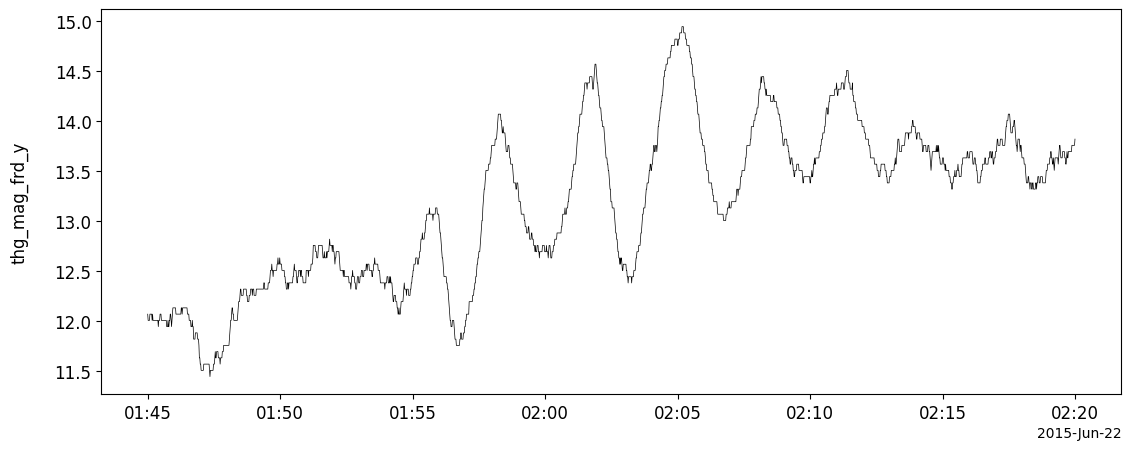

In [41]:
import pyspedas, pytplot

date_start = '2015-06-22T01:45:00'
date_end = '2015-06-22T02:20:00'
# Load data from FDR station
pyspedas.themis.gmag(sites='frd', trange=[date_start, date_end], time_clip=True)

# Split data into individual components
pytplot.split_vec('thg_mag_frd')

# Plot y component
pytplot.tplot('thg_mag_frd_y')

The output from pytplot is the same as in Figure 1 from Heyns et al. (2020) 

# Search for nearby stations

FRD station coordinates are presented in Table 1 from Heyns et al. (2020)

| Station         | Geographic latitude | Geographic longitude | Geomagnetic MLat. | Geomagnetic MLon. |
|-----------------|---------------------|----------------------|-------------------|-------------------|
| Fredericksburg  | 38.2°               | −77.4°               | 47.8°             | −0.2°             |

To find nearby station we can use the (https://ds.iris.edu/gmap/) webpage.





In [42]:
from IPython.display import IFrame
from datetime import datetime, timedelta

date_fmt = "%Y-%m-%dT%H:%M:%S"
sdate = datetime.strptime(date_start, date_fmt).strftime('%Y-%m-%d') # Only date 
edate =(datetime.strptime(date_start, date_fmt) + timedelta(days=1)).strftime('%Y-%m-%d') # Only date but plus one day
net = '*' # Select all networks
lat = 38.2 # Geographic latitude
lon = -77.4 # Geographic longitude
rad = 8  # Radius of the area

# Construct url using fstring
url= f'https://ds.iris.edu/gmap/#network={net}&starttime={sdate}&endtime={edate}&latitude={lat}&longitude={lon}&maxradius={rad}&drawingmode=radial&planet=earth'
print(url)
IFrame(url, 900,500)

https://ds.iris.edu/gmap/#network=*&starttime=2015-06-22&endtime=2015-06-23&latitude=38.2&longitude=-77.4&maxradius=8&drawingmode=radial&planet=earth


The previous request provided multiple stations, including FRD. Now we need to limit the search to the stations that can provide magnetometer data in IRIS. Those stations will have channels that can be presented as '\*F\*'. However, the wildcard '\*F\*' will return channels that also ends with 'F' and do not represent magnetic field data. Hence, we include only list of channels that corerpond to low frequency magnetic field measurments: LF\*, VF\*, UF\*  

In [43]:
channel = "LF*,VF*,UF*" 
url= f'https://ds.iris.edu/gmap/#network={net}&channel={channel}&starttime={sdate}&endtime={edate}&latitude={lat}&longitude={lon}&maxradius={rad}&drawingmode=radial&planet=earth'
print(url)
IFrame(url, 900,500)

https://ds.iris.edu/gmap/#network=*&channel=LF*,VF*,UF*&starttime=2015-06-22&endtime=2015-06-23&latitude=38.2&longitude=-77.4&maxradius=8&drawingmode=radial&planet=earth


Let select station **REQ48** from network **4P** and load data using mth5 format

2023-11-09T18:52:58.726251-0800 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_REQ48_20150622T014500_20150622T022000.h5


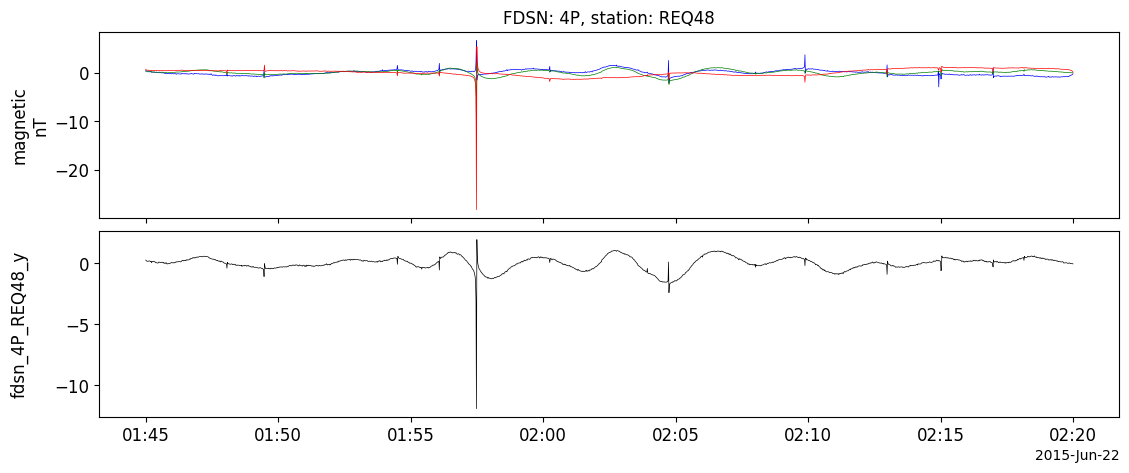

In [50]:
from pyspedas.mth5.load_fdsn import load_fdsn
load_fdsn(network="4P", station="REQ48", trange=[date_start, date_end], nodownload=True)

# Split data into individual components
pytplot.split_vec('fdsn_4P_REQ48')

# Plot all data and the y component
pytplot.tplot(['fdsn_4P_REQ48', 'fdsn_4P_REQ48_y'])

Let explore another station **BIRD** from the network **CO**

In [52]:
load_fdsn(network="CO", station="BIRD", trange=[date_start, date_end], nodownload=True)

# Split data into individual components
pytplot.split_vec('fdsn_CO_BIRD')

# Plot all data and the y component
pytplot.tplot(['fdsn_CO_BIRD', 'fdsn_CO_BIRD_y'])

2023-11-09T18:56:09.526880-0800 | WARNING | mth5.mth5 | open_mth5 | CO_BIRD.h5 will be overwritten in 'w' mode
2023-11-09T18:56:09.915880-0800 | INFO | mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file c:\work\Data\SPEDAS\mth5\CO_BIRD.h5 in mode w
2023-11-09T18:56:10.400978-0800 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\CO_BIRD.h5


09-Nov-23 18:56:10: Cannot initialize mth5 object


FDSNNoDataException: No data available for request.
HTTP Status code: 204
Detailed response of server:



# Inspecting available stations for network TVA

The data availability can be inspected using https://fdsn.org/networks/ web interface

In [6]:
IFrame("https://fdsn.org/networks/", 900,500)

Or you can check data availability via https://service.iris.edu/fdsnws/availability/docs/1/builder/
Example of URL:
https://service.iris.edu/irisws/fedcatalog/1/query?net=8P&starttime=2019-01-01&endtime=2022-12-31&format=text&includeoverlaps=true&nodata=404

In [10]:
url = 'https://service.iris.edu/irisws/fedcatalog/1/query?net=8P&starttime=2019-01-01&endtime=2022-12-31&format=text&includeoverlaps=true&nodata=404'
with urllib.request.urlopen(url) as response:
   html = response.read()
print(html)

b'#Network | Station | Location | Channel | Latitude | Longitude | Elevation | Depth | Azimuth | Dip | SensorDescription | Scale | ScaleFreq | ScaleUnits | SampleRate | StartTime | EndTime\n\n#DATACENTER=IRISDMC,http://ds.iris.edu\n8P|AZT14||LFE|36.828061|-113.333273|1210.3|0.0|101.0861|0.0|NIMS|100.9048|0.011|nT|1.0|2021-03-18T19:00:09|2021-03-18T19:29:13\n8P|AZT14||LFE|36.828061|-113.333273|1210.3|0.0|102.9|0.0|NIMS|100.9048|0.011|nT|1.0|2021-03-18T19:40:16|2021-03-31T17:53:32\n8P|AZT14||LFE|36.828061|-113.333273|1210.3|0.0|100.977|0.0|NIMS|100.9048|0.011|nT|1.0|2021-03-31T18:36:39|2021-04-11T17:28:05\n8P|AZT14||LFN|36.828061|-113.333273|1210.3|0.0|11.0861|0.0|NIMS|100.9048|0.011|nT|1.0|2021-03-18T19:00:09|2021-03-18T19:29:13\n8P|AZT14||LFN|36.828061|-113.333273|1210.3|0.0|12.9|0.0|NIMS|100.9048|0.011|nT|1.0|2021-03-18T19:40:16|2021-03-31T17:53:32\n8P|AZT14||LFN|36.828061|-113.333273|1210.3|0.0|10.977|0.0|NIMS|100.9048|0.011|nT|1.0|2021-03-31T18:36:39|2021-04-11T17:28:05\n8P|AZT14||L